In [15]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 

# Reading the traina and test data from the txt file
X_train = pd.read_csv('Dataset/UCI HAR Dataset/train/X_train.txt',delim_whitespace=True,header=None)
Y_train = pd.read_csv('Dataset/UCI HAR Dataset/train/y_train.txt',delim_whitespace=True,header=None)
X_test = pd.read_csv('Dataset/UCI HAR Dataset/test/X_test.txt',delim_whitespace=True,header=None)
Y_test = pd.read_csv('Dataset/UCI HAR Dataset/test/y_test.txt',delim_whitespace=True,header=None)

Y_train = Y_train.squeeze()
Y_test = Y_test.squeeze()

In [16]:
print("X_train shape = %s, Y_train shape= %s "%(X_train.shape, X_test.shape))

X_train shape = (7352, 561), Y_train shape= (2947, 561) 


Text(0.5, 1.0, 'Data visualization')

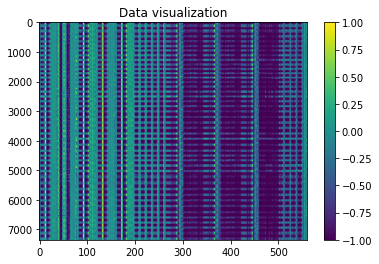

In [17]:
# plt.figure(figsize=(14,12))
plt.imshow(X_train, aspect='auto')
plt.colorbar()
plt.title('Data visualization')

In [4]:
from sklearn.decomposition import PCA
pca = PCA()

In [5]:
pca.fit(X_train)

PCA()

Text(0.5, 0, 'PCA dimension')

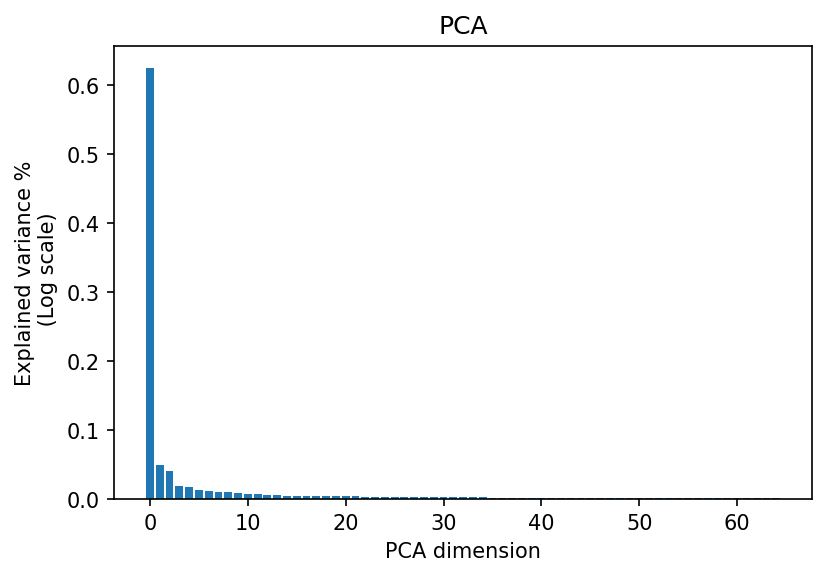

In [20]:
plt.figure(dpi=150)
plt.bar(np.arange(0,65), pca.explained_variance_ratio_[0:65])
plt.title('PCA')
plt.ylabel('Explained variance %\n (Log scale)')
plt.xlabel('PCA dimension')
# plt.yscale('log')

In [21]:
pca.explained_variance_ratio_[0:65].sum()

0.9485348713946782

In [22]:
pca = PCA(n_components=65)
pca.fit(X_train)

PCA(n_components=65)

In [23]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
print(X_train.shape ,X_train_pca.shape)
print(X_test.shape ,X_test_pca.shape)

(7352, 561) (7352, 65)
(2947, 561) (2947, 65)


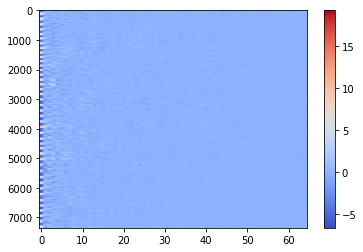

In [25]:
plt.imshow(X_train_pca, aspect='auto', cmap='coolwarm')
plt.colorbar()

In [26]:

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_pca,Y_train)
predictions = logisticRegr.predict(X_test_pca)

#getting the accuracy
score = logisticRegr.score(X_test_pca, Y_test)
print(score)

0.9443501866304717
/Users/naveensr/miniconda3/envs/HAR/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[488   4   4   0   0   0]
 [ 32 429  10   0   0   0]
 [  3  23 394   0   0   0]
 [  0   3   0 427  61   0]
 [  2   0   0  24 506   0]
 [  0   0   0   0   0 537]]


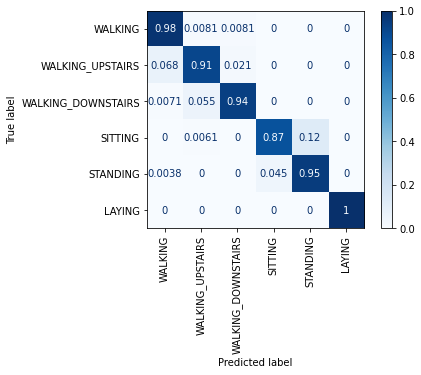

In [88]:
from sklearn.metrics import plot_confusion_matrix
class_names = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
plot_confusion_matrix(logisticRegr, X_test_pca, Y_test, cmap=plt.cm.Blues,
                                display_labels=class_names, xticks_rotation=90,
                                normalize='true')